In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
FOLDER_PATH = "sentiment_datasets/projekt2_data"

In [4]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, "train.tsv"), delimiter="\t")
train_df = train_df.drop(columns=train_df.columns[0], axis=1)
train_df.head()

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,1
1,1,A series of escapades demonstrating the adage ...,2
2,1,A series,2
3,1,A,2
4,1,series,2


In [5]:
val_df = pd.read_csv(os.path.join(FOLDER_PATH, "valid.tsv"), delimiter="\t", header=None)
val_df = val_df.drop(columns=val_df.columns[0], axis=1)
val_df.columns = train_df.columns
val_df.head()

,SentenceId,Phrase,Sentiment
0,7622,democracy,2
1,7622,and civic action laudable,3
2,7622,civic action laudable,2
3,7622,action laudable,3
4,7623,Griffin & Co. manage to be spectacularly outra...,4


In [6]:
test_df = pd.read_csv(os.path.join(FOLDER_PATH, "test.tsv"), delimiter="\t", header=None)
test_df = test_df.drop(columns=test_df.columns[0], axis=1)
test_df.columns = train_df.columns
test_df.head()

,SentenceId,Phrase,Sentiment
0,8068,feminist conspiracy theorist,2
1,8068,conspiracy theorist,2
2,8068,theorist,2
3,8068,named Dirty Dick,2
4,8068,Dirty Dick,2


In [7]:
train_df["df_"] = 0
val_df["df_"] = 1
test_df["df_"] = 2
data_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [29]:
train_df.Sentiment.value_counts()/train_df.shape[0]

2    0.512418
3    0.211444
1    0.172008
4    0.059000
0    0.045129
Name: Sentiment, dtype: float64

In [31]:
val_df.Sentiment.value_counts()/val_df.shape[0]

2    0.485641
3    0.217436
1    0.194744
4    0.060128
0    0.042051
Name: Sentiment, dtype: float64

In [30]:
test_df.Sentiment.value_counts()/test_df.shape[0]

2    0.490000
1    0.205769
3    0.195128
4    0.055641
0    0.053462
Name: Sentiment, dtype: float64

`Jako baseline przyjmuje klasyfikator oznaczający każdą wypowiedź jako neutralną(2), co powinno dać mi accuracy 50%`

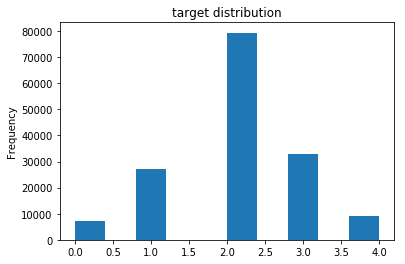

In [21]:
data_df.Sentiment.plot(kind="hist", title="target distribution");

In [12]:
from utils import char_distribution
from preprocess_data import clear_text

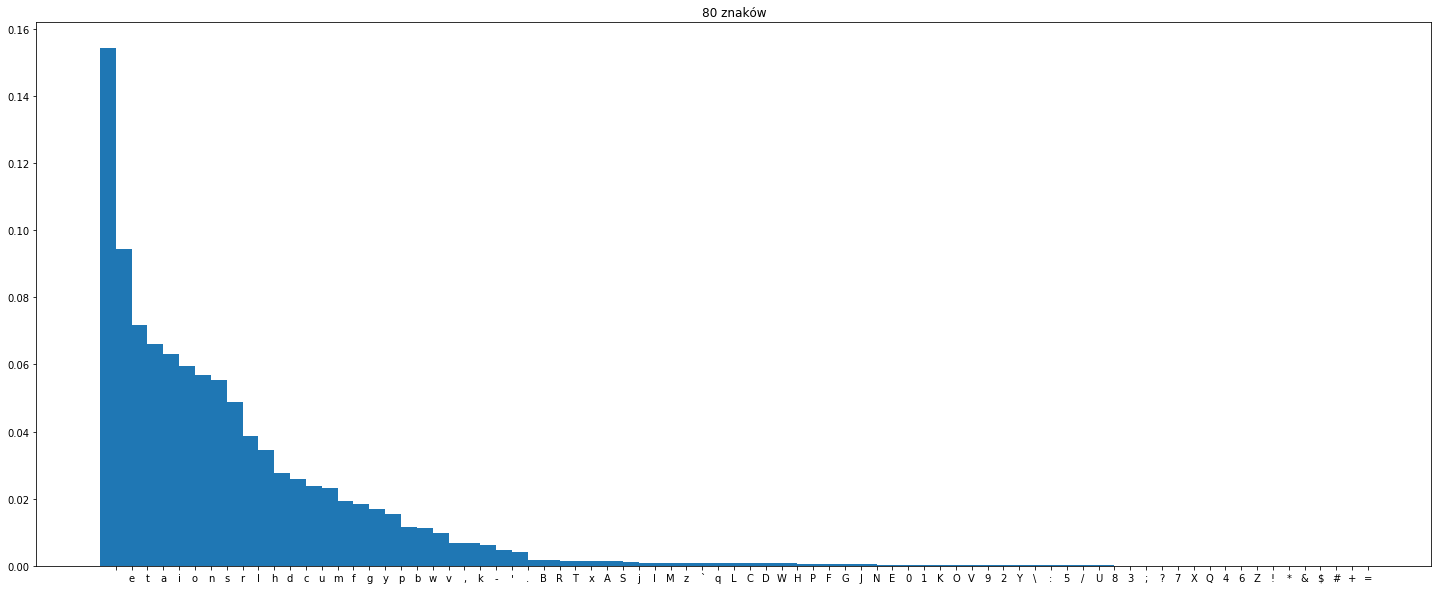

In [11]:
# before
char_dist = char_distribution(data_df["Phrase"])

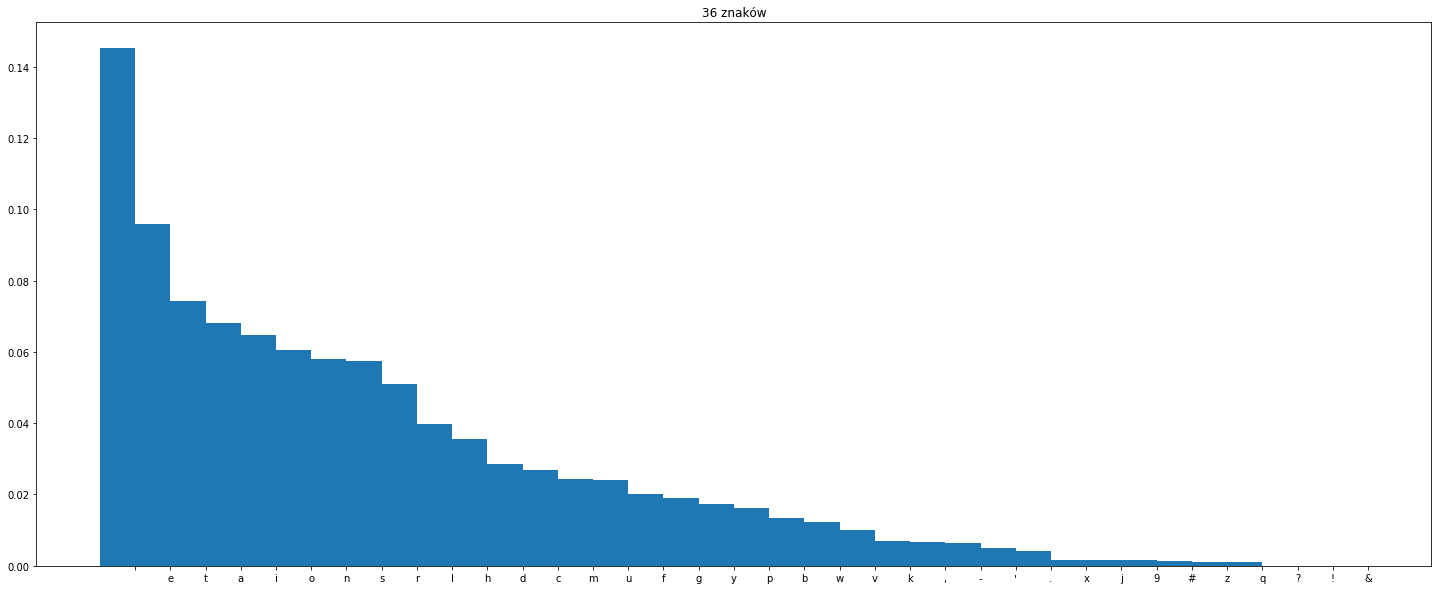

In [13]:
# after
data_df["Phrase"] = clear_text(data_df["Phrase"], is_all_lower=True)
char_dist = char_distribution(data_df["Phrase"])

In [14]:
train_df = data_df[data_df["df_"] == 0]
val_df = data_df[data_df["df_"] == 1]
test_df = data_df[data_df["df_"] == 2]

In [15]:
train_df.to_csv(os.path.join(FOLDER_PATH, "train_cleaned.csv"), sep=",", index=False)
val_df.to_csv(os.path.join(FOLDER_PATH, "val_cleaned.csv"), sep=",", index=False)
test_df.to_csv(os.path.join(FOLDER_PATH, "test_cleaned.csv"), sep=",", index=False)

Tekst wyczyszczony w następujący sposób:<br>
> Wyrzucenie znaków spoza ASCII<br>
> Zamienienie znakow z string.punctuation poza .,!?&- na #<br>
> Zamienienie cyfr z string.digits na 9<br>
> Zamiana ciagów złożonych ze znaku spacji " " dłuższych niż 1 na " "<br>
> Wyrzucienie spacji poprzedzających .,!?&-<br>
> Zamiana wszystkich liter na małe